In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing


In [2]:
def load_files(path):
    loss = np.loadtxt(path+'training_loss.txt')
    # print(loss)
    # loss = loss/535
    # print('_'*10)
    # print(loss)
    loss = loss/([535]*len(loss))
    acc = np.loadtxt(path+'training_accuracy.txt')
    domain = np.loadtxt(path+'domain_labels.txt')
    te_loss = np.loadtxt(path+'testing_loss.txt')
    te_loss = te_loss/([131]*len(te_loss))
    te_acc = np.loadtxt(path+'testing_accuracy.txt')
    machine = np.loadtxt(path+'machine_labels.txt', dtype = str)
    Z = np.load(path+'Z_space.npy')
    #args = np.loadtxt(path+'arguments.txt', dtype = str, delimiter = '\n')
    args =[]
    le =  preprocessing.LabelEncoder()
    le.fit(machine)
    machine_num = le.transform(machine)
    machine_num = np.concatenate((machine_num, [0])) #FIXME
    
    return loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args

In [3]:
def plot_loss_acc(loss, acc, te_loss, te_acc, pretraining):
    x = np.arange(0,len(loss))
    #plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(x, loss)
    plt.plot(x, te_loss)
    plt.legend(['Training Loss', 'Testing loss'])
    plt.title(pretraining+' Loss ')

    plt.subplot(1,2,2)
    plt.plot(x, acc)
    plt.plot(x, te_acc)
    plt.title(pretraining+' Accuracy ')
    plt.legend(['Training Accuracy', 'Testing Accuracy'])
    plt.ylim(0, 1)
    #plt.show()



In [4]:
ex1='2022-10-03 17:08:05.262385/'
ex2 ='2022-10-03 16:08:33.982757/'
ex3 ='2022-09-27 15:33:15.358339/'

In [6]:
ex ='2022-10-09 21:38:29.092510/'
ex = '2022-10-11 13:50:48.083335/'
ax = '2022-10-12 12:44:50.953692/'
ex = '2022-10-13 10:39:12.990541/'
ex = '2022-10-13 14:45:03.021888/'
ex = '2022-10-13 18:40:47.923046/'
ex = '2022-10-14 03:34:22.593797/'
ex = '2022-10-14 03:34:22.795011/'
ex = '2022-10-14 08:23:55.432034/'
ex = '2022-10-14 21:25:46.977057/'
#ex = '2022-10-11 11:40:10.018008/'
ex = '2022-10-19 12:07:48.340494/'
ex = '2022-10-27 10:43:13.195640/'

In [15]:
from matplotlib.colors import ListedColormap
def TSNE_funtion(perplexity, lr, n_iter, Z,domain, machine_num, title, produce_visuals=True):
    Z_embedded = TSNE(n_components=2, perplexity = perplexity, learning_rate= lr,init='random', n_iter =n_iter).fit_transform(Z)
    print(Z_embedded.shape)
    if produce_visuals:
        print(set(domain), set(machine_num))
        palette = ['red', 'blue', 'orange', 'green']
        plt.figure(figsize = (15, 10))
        plt.subplot(1,2,1)
        sns.scatterplot(x=Z_embedded[:, 0], y=Z_embedded[:, 1], hue=domain, palette=palette[:len(set(domain))]).set(title="HER 2 domain visualization") 
        plt.subplot(1,2,2)
        print(domain.shape, machine_num.shape)
        sns.scatterplot(x=Z_embedded[:513, 0], y=Z_embedded[:513, 1], hue = machine_num, palette=palette[:len(set(machine_num))]).set(title="HER 2 machine visualization")
        plt.show()
        
        Z_embedded2 = TSNE(n_components=3, perplexity = perplexity, learning_rate= lr,init='random', n_iter =n_iter).fit_transform(Z)
        print(Z_embedded2.shape)
        cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# # plot
# sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
        ax = plt.axes(projection='3d')
        ax.scatter3D(Z_embedded2[:513, 0], Z_embedded2[:513, 1], Z_embedded2[:513, 2], c=machine_num[:513], marker='o', cmap=palette[:len(set(domain))])')
        ax.set_xlabel("comp 1")
        ax.set_ylabel("comp 2")
        ax.set_zlabel("comp 3")

        #plt.title(title)
       

SyntaxError: unterminated string literal (detected at line 23) (3545364555.py, line 23)

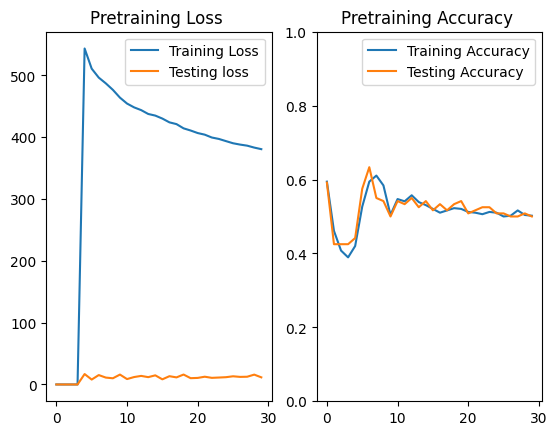

In [8]:
loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args = load_files(ex)
N = 99
plot_loss_acc(loss[:N], acc[:N], te_loss[:N], te_acc[:N], 'Pretraining')

#loss_p, acc_p, domain_p, machine_p, machine_num_p, Z_p = load_files('positive/')

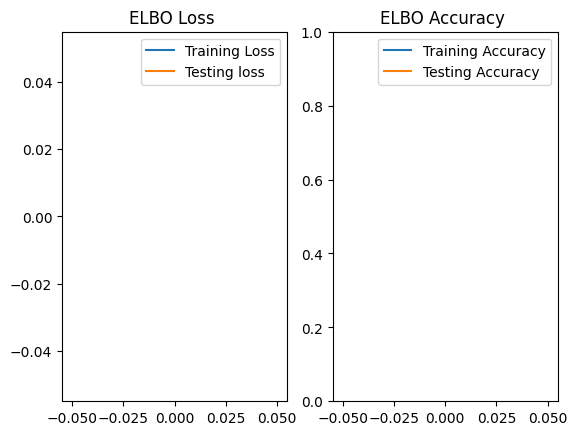

In [9]:
plot_loss_acc(loss[N+1:], acc[N+1:], te_loss[N+1:], te_acc[N+1:], 'ELBO')

In [10]:
# from torch.utils.tensorboard import SummaryWriter
# path ='../debug'
# for exp in os.listdir(path):
#     if ex[:17] in exp:
#         experiment = exp
#         path+='/'+exp
# writer = SummaryWriter(path)
# class_labels = domain
# writer.add_embedding(Z,metadata=class_labels)    
#     #+ex #/debug/'+ex
# print(os.listdir(path))
# #write_embeddings(x = batch_imgs.to(DEVICE))
# writer.close()

In [11]:
domain = domain[:-1]


In [12]:
domain.shape

(488,)

In [13]:
machine.shape

(488,)

In [14]:
def plot_histogram(domain_labels, machine_label):

    print(set(domain_labels), set(machine_label))
    d1_machine = []
    d2_machine = []
    d3_machine = []

    for i in range(0, len(domain_labels) - 1):

        if domain_labels[i] == 1:
            d1_machine.append(machine_label[i])
        elif domain_labels[i] == 2:
            d2_machine.append(machine_label[i])
        elif domain_labels[i] == 3:
            d3_machine.append(machine_label[i])
            

    from matplotlib import pyplot as plt
    plt.figure(figsize = (10, 15))
    plt.subplot(3, 1, 1)
    plt.hist(d1_machine)
    plt.title('Class 1 Cancerous Tissue Scan Sources')

    plt.subplot(3, 1, 2)
    plt.hist(d2_machine)
    plt.title('Class 2 Cancerous Tissue Scan Sources')

    
    plt.subplot(3, 1, 3)
    plt.hist(d3_machine)
    plt.title('Class 3 Cancerous Tissue Scan Sources')
    plt.show()
    # plt.savefig('./figures/hist_results'+str(epoch)+'.png')


{2.0, 3.0, 4.0} {0, 1, 2, 3}


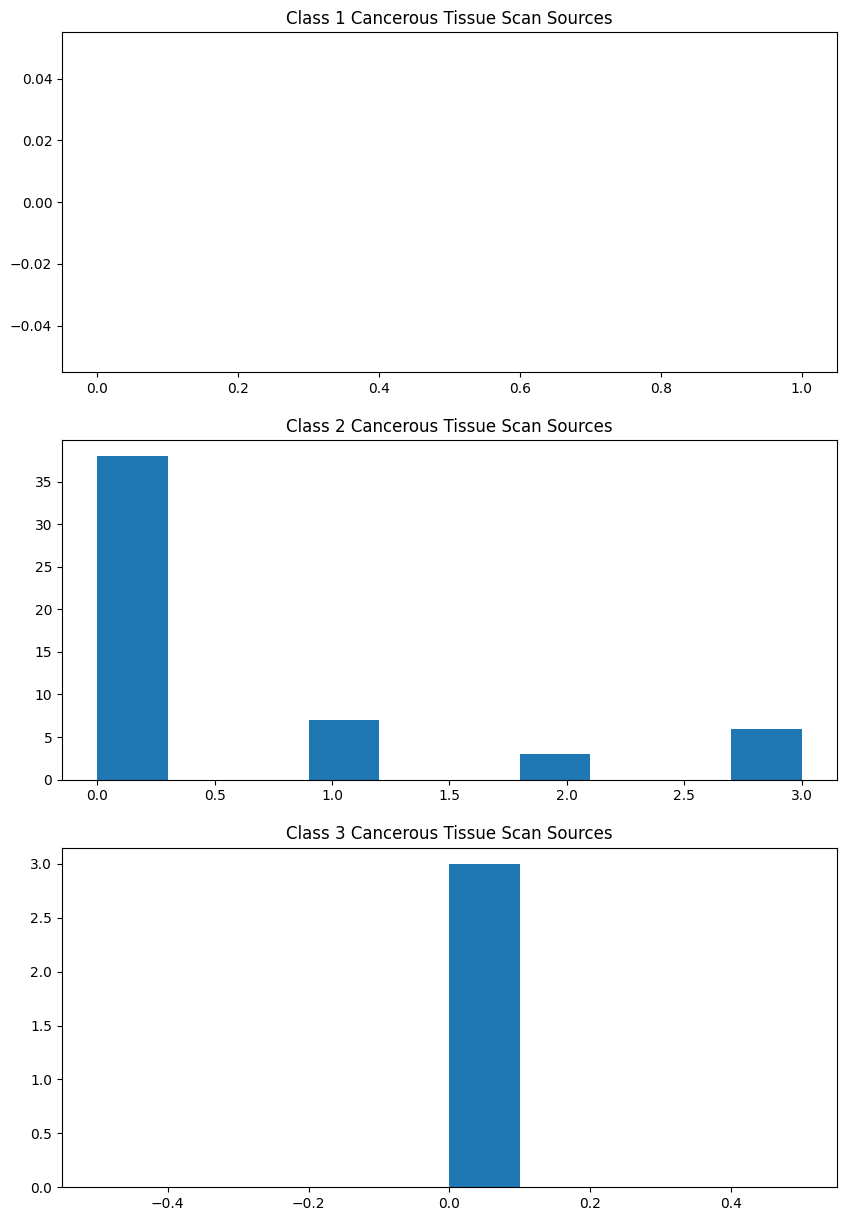

In [16]:
plot_histogram(true_label, domain)

In [15]:
plot_histogram(true_label, machine_num)

NameError: name 'true_label' is not defined

In [33]:
# experiments = [ex1, ex2, ex3]
# legend_loss = []
# legend_acc = []
# plt.figure(figsize = (25, 25))
# for ex in experiments:
#     loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args = load_files(ex)
#     #print(args)
#     #plot_loss_acc(loss, acc, te_loss, te_acc)
#     x = np.arange(0,len(loss))
#     plt.subplot(2, 1, 1)
#     plt.plot(x, loss)
#     plt.plot(x, te_loss)
#     plt.title('Loss ')
#     legend_loss.append('Loss: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
#     legend_loss.append('Loss_te: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
    
#     plt.subplot(2,1,2)
#     plt.plot(x, acc)
#     plt.plot(x, te_acc)
#     plt.title('Accuracy ')
#     plt.ylim(0, 1)
#     legend_acc.append('Acc: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
#     legend_acc.append('Acc_te: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5])
# #print(len(legend))
# plt.subplot(2,1,1)
# plt.legend(legend_loss)
# plt.subplot(2,1,2)
# plt.legend(legend_acc)
# plt.show()

In [34]:
experiments = [ex]
Z.shape

(537, 250)

In [35]:
# perplexity, lr, n_iter

In [36]:
# for i in range(2, 80, 20):
#     title = 'Experiment: '+args[0]+" " +args[1]+": zd_dim = "+args[3]+ " ,lr = "+args[7]+ " ,num_classes = "+args[5]
    
#     TSNE_funtion(i, 2, 450, Z,domain, machine_num,title, produce_visuals=True)


In [17]:
def machines_per_domain(domain, machine, fs, experiment_name):
    plt.figure(figsize = (15,5))
    for i in range(1,4):
        ND=0
        H1=0
        H2=0
        FD=0

        for j in range(len(machine)):
            if domain[j] == i and machine[j]=='ND':
                ND+=1
            if domain[j] == i and machine[j]=='H1':
                H1+=1
            if domain[j] == i and machine[j]=='H2':
                H2+=1
            if domain[j] == i and machine[j]=='FD':
                FD+=1
        plt.subplot(1,3,i)    
        plt.bar([0, 2, 4, 6], [ND, H1, H2, FD])
        plt.xticks([0, 2, 4, 6], ['ND', 'H1', 'H2', 'FD'], fontsize = fs)
        plt.title(experiment_name+' Domain # ' +str(i), fontsize = fs)
        plt.ylim(0, 150)


    plt.show() 

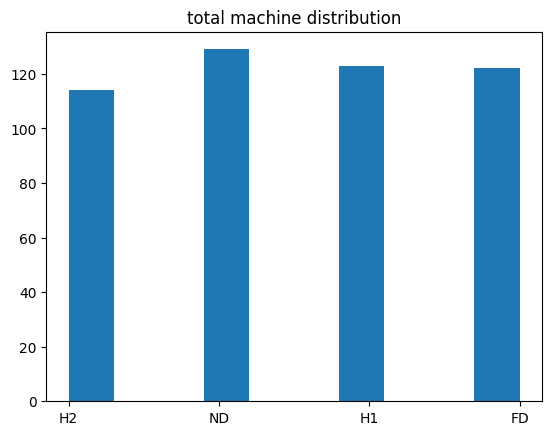

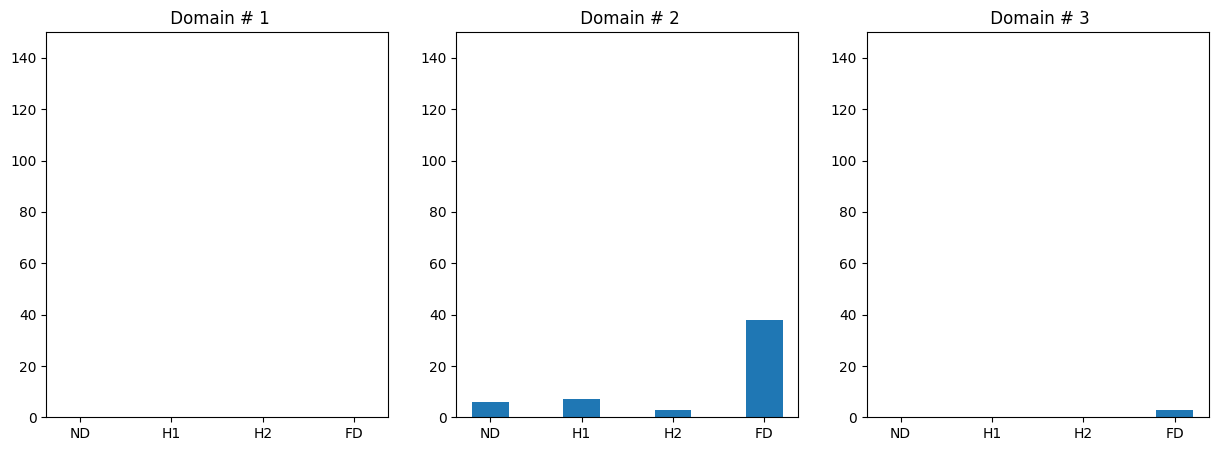

In [18]:
plt.hist(machine)
plt.title('total machine distribution')
machines_per_domain(domain, machine, '')
#machines_per_domain(domain_p, machine_p, 'Positive loss')

In [39]:
def domain_per_machine(domain, machine, experiment_name):
    plt.figure(figsize = (15,5))
    machine_num = np.unique(machine)
    domain_names = [1, 2, 3]
    counter=0
    c = 0
    print(len(domain_names), machine_num)
    for i in machine_num:

        d1 = 0
        d2 =0
        d3 =0


        for j in range(len(domain)):
            #print(i, j, domain[j], machine[j])
            if domain[j]==domain_names[0] and machine[j]==i:
                d1+=1
            if domain[j]== domain_names[1] and machine[j]==i:
                d2+=1
            try:
                if domain[j]==domain_names[2] and machine[j]==i:
                    d3+=1
            except:
                c+=1
        print([d1, d2, d3])
        plt.subplot(1,4,counter+1)    
        plt.bar([0, 2, 4], [d1, d2, d3])
        plt.xticks([0, 2, 4], ['D1', 'D2', 'D3'])
        plt.title(experiment_name+' Machine # ' +str(i))
        plt.ylim(0, 150)
        counter+=1


    plt.show() 

3 ['FD' 'H1' 'H2' 'ND']
[27, 44, 12]
[3, 56, 10]
[3, 64, 13]
[5, 61, 9]


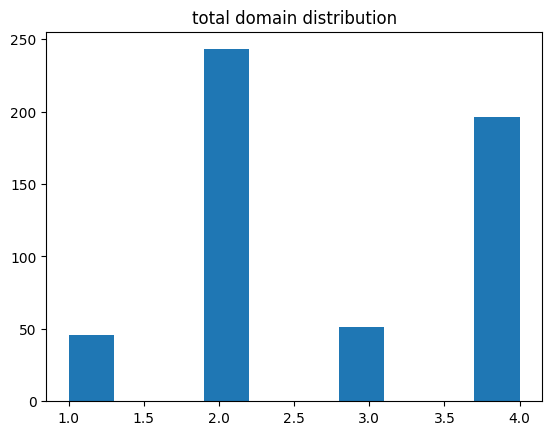

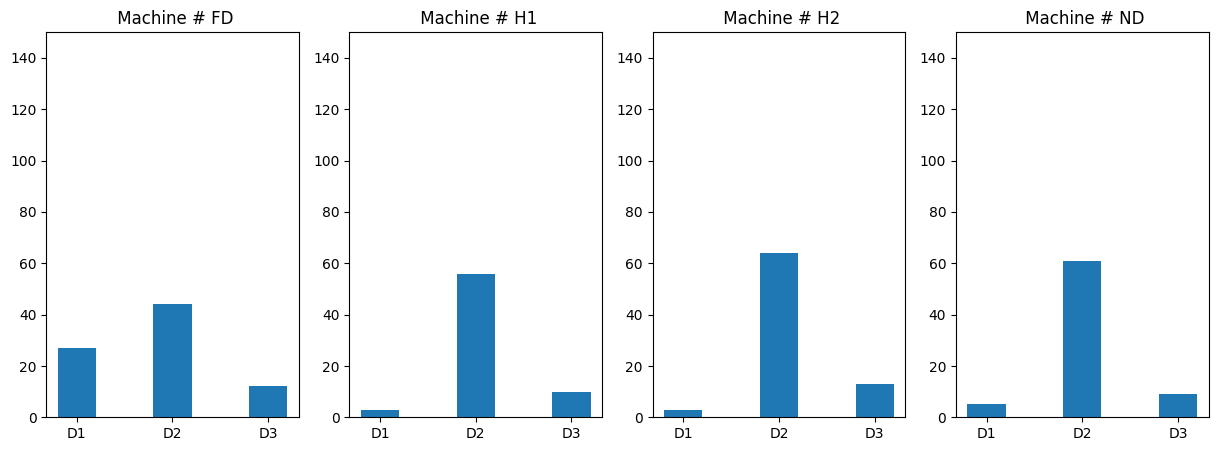

In [40]:
plt.hist(domain)
plt.title('total domain distribution')
domain_per_machine(domain, machine, '')

In [41]:
import pandas as pd
scores = pd.read_csv('../HER2/truthfile_002.csv', names=['num', 'file name', 's1', 's2', 's3', 's4', 's5', 's6', 's_7']) 
# def box_pot():
    

In [42]:
(44+70+80+42+37+91+60)/7

60.57142857142857

In [43]:
scores

,num,file name,s1,s2,s3,s4,s5,s6,s_7
0,4816\,"4816-22281,2869.tif",51,38,42,33,50,68,46
1,4816\,"4816-4772,4119.tif",46,50,60,50,50,32,62
2,4816\,"4816-8176,8561.tif",54,29,45,37,50,50,26
3,5578\,5578-2.tif,44,70,80,42,37,91,60
4,5578\,5578-5.tif,58,27,28,32,27,28,30
...,...,...,...,...,...,...,...,...,...
236,s06-8304\,s06-8304-51447-9570.tif,80,34,93,27,76,88,60
237,s06-8342\,s06-8342-67888-15878.tif,70,96,95,76,78,90,85
238,s06-870-A1\,s06-870-A1-21141-6608.tif,30,29,58,40,28,38,45
239,s06-870-A1\,s06-870-A1-4311-11774.tif,37,55,60,48,61,79,50


In [45]:
a = scores.loc[scores['file name'].str.contains('5578-2.tif')].mean(axis =1)
#df.loc[df['column_name'].isin(some_values)]
print(os.getcwd())
path = ex
print(path+'image_locs.txt')
img_locs = np.loadtxt(path+'image_locs.txt', str)

/home/didsr/Documents/DomId/notebooks
2022-10-19 12:07:48.340494/image_locs.txt


/tmp/ipykernel_6645/669955622.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = scores.loc[scores['file name'].str.contains('5578-2.tif')].mean(axis =1)


In [46]:
img_locs[0].split('/')[3][:-4]

'S06-106-2620-869H2'

In [47]:
M = []
for prediction in img_locs:
    prediction = str(prediction.split('/')[3])

    if 's' in prediction:
        
        N = (len(prediction)-4-5)
        # print(N, prediction[:N])
        # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
        mean_score = scores.loc[scores['file name'].str.contains(prediction[:N])].mean(axis=1)
    if 'S' in prediction:
        
        N = (len(prediction)-4-5)
        # print(N, prediction[:N])
        # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
        mean_score = scores.loc[scores['file name'].str.contains(prediction[:N])].mean(axis=1)
    else:
        N = len(prediction)-6
        # print('secod case', N, prediction[:N])
        # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
        mean_score = scores.loc[scores['file name'].str.contains(prediction[:N])].mean(axis=1)
   
    mean_score = float(mean_score)
    #print(mean_score)
    M.append(mean_score)

/tmp/ipykernel_6645/2260425935.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[scores['file name'].str.contains(prediction[:N])].mean(axis=1)
/tmp/ipykernel_6645/2260425935.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[scores['file name'].str.contains(prediction[:N])].mean(axis=1)
/tmp/ipykernel_6645/2260425935.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[scores['file name'].str.contains(predict

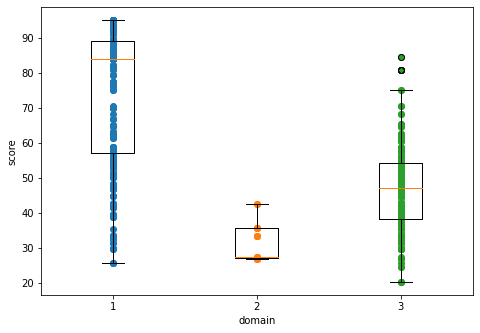

In [103]:
data1 =[]
data2 = []
data3 =[]
for i in range(len(domain)):
    if domain[i] ==1:
        data1.append(M[i])
    if domain[i] ==2:
        data2.append(M[i])
    if domain[i] ==3:
        data3.append(M[i])
data = [data1, data2, data3]
fig = plt.figure()
# Creating axes instance
#ax = fig.add_axes([1, 2, 3])#, 1])
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
ax.scatter([1]*len(data[0]), data[0])
ax.scatter([2]*len(data[1]), data[1])
ax.scatter([3]*len(data[2]), data[2])
plt.xlabel('domain')
plt.ylabel('score')
plt.show()

AttributeError: 'list' object has no attribute 'get'

In [156]:
hist = []
for prediction in img_locs:
    prediction = str(prediction.split('/')[3])
    hist.append(len(prediction)-4)

(array([ 10.,   0.,   0.,   0.,  49.,  59.,  21., 151., 211.,  35.]),
 array([ 8. ,  9.7, 11.4, 13.1, 14.8, 16.5, 18.2, 19.9, 21.6, 23.3, 25. ]),
 <BarContainer object of 10 artists>)

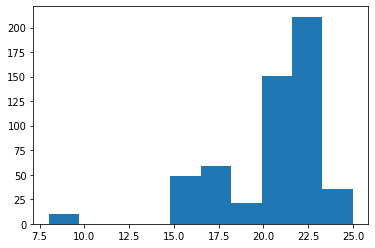

In [154]:
plt.hist(hist)

In [38]:
img_locs[0].split('/')[2][-4]

'2'

In [48]:
true_label = []

for i in img_locs:
    true_label.append(int(i.split('/')[2][-4]))
    

In [49]:
print(true_label[-10:])
print(domain[0:10])

[3, 1, 2, 2, 3, 3, 3, 2, 2, 3]
[3. 2. 3. 4. 2. 2. 4. 4. 4. 3.]


In [84]:
a = list(reversed(true_label))

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [88]:
cm = confusion_matrix(domain[:-1], true_label)

In [89]:
cm

array([[  9,  98, 188],
       [  9,   8,   0],
       [ 30, 184,  10]])

<AxesSubplot:>

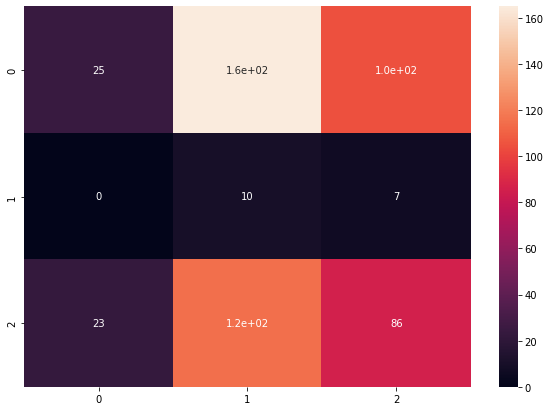

In [87]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)